In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras import datasets

Using TensorFlow backend.


In [ ]:
def DNN_ModelSequential(n_input, n_hidden, n_hidden2, n_out):
  model = Sequential()
  model.add(Dense(n_hidden, input_shape=(n_input,), activation='relu'))
  model.add(Dense(n_hidden2, activation='relu'))
  model.add(Dense(n_out, activation='softmax')) 

  opt = Adam(lr=0.01)
  model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


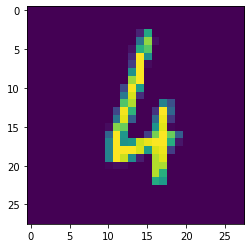

4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 154   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  95 213  11   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  12 159 188   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29 254 126   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  46 254   7   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 129 254 

In [ ]:
mySample = np.random.randint(60000)
plt.imshow(X_train[mySample])
plt.show()
print(Y_train[mySample])
print(X_train[mySample])

In [ ]:
def Data_func():
  (X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
  Y_train = np_utils.to_categorical(Y_train)
  Y_test = np_utils.to_categorical(Y_test)
  L, W, H = X_train.shape
  X_train = X_train.reshape(-1, W * H)
  X_test = X_test.reshape(-1, W * H)
  X_train = X_train / 255
  X_test = X_test / 255
  return (X_train, Y_train), (X_test, Y_test)

In [ ]:
model = DNN_ModelSequential(784, 128, 128, 10)
(x_train, y_train), (x_test, y_test) = Data_func()
print(model.summary())
print(x_train.shape, y_train.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
(60000, 784) (60000, 10)


In [ ]:
fit_hist = model.fit(x_train, y_train, epochs=15, batch_size=128, 
                     validation_split=0.2)
performance_test = model.evaluate(x_test, y_test, batch_size=128)
print('test Loss Accurecy -> ',performance_test)

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.2568 - accuracy: 0.9211 - val_loss: 0.1722 - val_accuracy: 0.9488
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1327 - accuracy: 0.9597 - val_loss: 0.1505 - val_accuracy: 0.9557
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1095 - accuracy: 0.9665 - val_loss: 0.1566 - val_accuracy: 0.9592
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0937 - accuracy: 0.9721 - val_loss: 0.1449 - val_accuracy: 0.9641
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0948 - accuracy: 0.9733 - val_loss: 0.1265 - val_accuracy: 0.9681
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0748 - accuracy: 0.9780 - val_loss: 0.1682 - val_accuracy: 0.9617
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0724 - accuracy: 0.9790 - val_loss: 0.1776 - val_accuracy: 0.9578
Epoch 

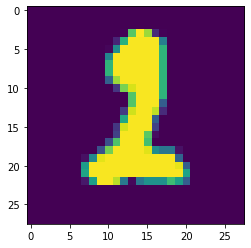

2
1


In [ ]:
mySample = np.random.randint(10000)
plt.imshow(X_test[mySample])
plt.show()
print(Y_test[mySample])
pred = model.predict(x_test[mySample].reshape(-1,784))
print(np.argmax(pred))

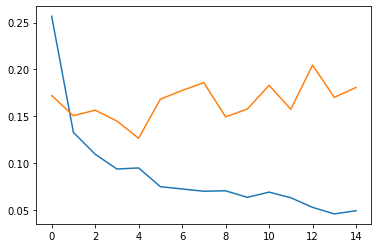

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

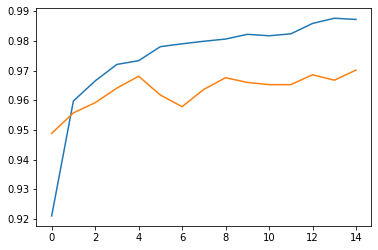

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()